[2.74, 2.74, 2.72, 2.73, 2.74, 2.72, 2.71, 2.72, 2.65, 2.66, 2.67, 2.68, 2.69, 2.69, 2.68, 2.64, 2.66, 2.67, 2.67, 2.67, 2.67, 2.62, 2.61, 2.56, 2.63, 2.64, 2.64, 2.63, 2.58, 2.58, 2.58, 2.61, 2.59, 2.54, 2.54, 2.54, 2.52, 2.47, 2.46, 2.43, 2.42, 2.38, 2.36, 2.32, 2.31, 2.29, 2.3, 2.3, 2.31, 2.43, 2.43, 2.43, 2.42, 2.41, 2.39, 2.41, 2.41, 2.41, 2.41, 2.41, 2.39, 2.38, 2.37, 2.36, 2.33, 2.35, 2.39, 2.36, 2.36, 2.35, 2.35, 2.32, 2.33, 2.37, 2.37, 2.39, 2.43, 2.47, 2.46, 2.45, 2.46, 2.46, 2.43, 2.42, 2.39, 2.4, 2.4, 2.39, 2.36, 2.35, 2.34, 2.32, 2.33, 2.34, 2.35, 2.36, 2.37, 2.36, 2.35, 2.34, 2.33, 2.33, 2.32, 2.31, 2.3, 2.3, 2.29, 2.28, 2.3, 2.3, 2.3, 2.3, 2.32, 2.32, 2.33, 2.32, 2.34, 2.37, 2.4, 2.39, 2.4, 2.4, 2.41, 2.39, 2.35, 2.34, 2.33, 2.34, 2.34, 2.35, 2.35, 2.33, 2.34, 2.35, 2.36, 2.37, 2.38, 2.39, 2.4, 2.42, 2.43, 2.43, 2.43, 2.43, 2.44, 2.45, 2.45, 2.44, 2.38, 2.27, 2.28, 2.29, 2.31, 2.31, 2.31, 2.29, 2.3, 2.3, 2.29, 2.29, 2.28, 2.29, 2.28, 2.28, 2.29, 2.26, 2.19, 2.18, 2.2, 2.

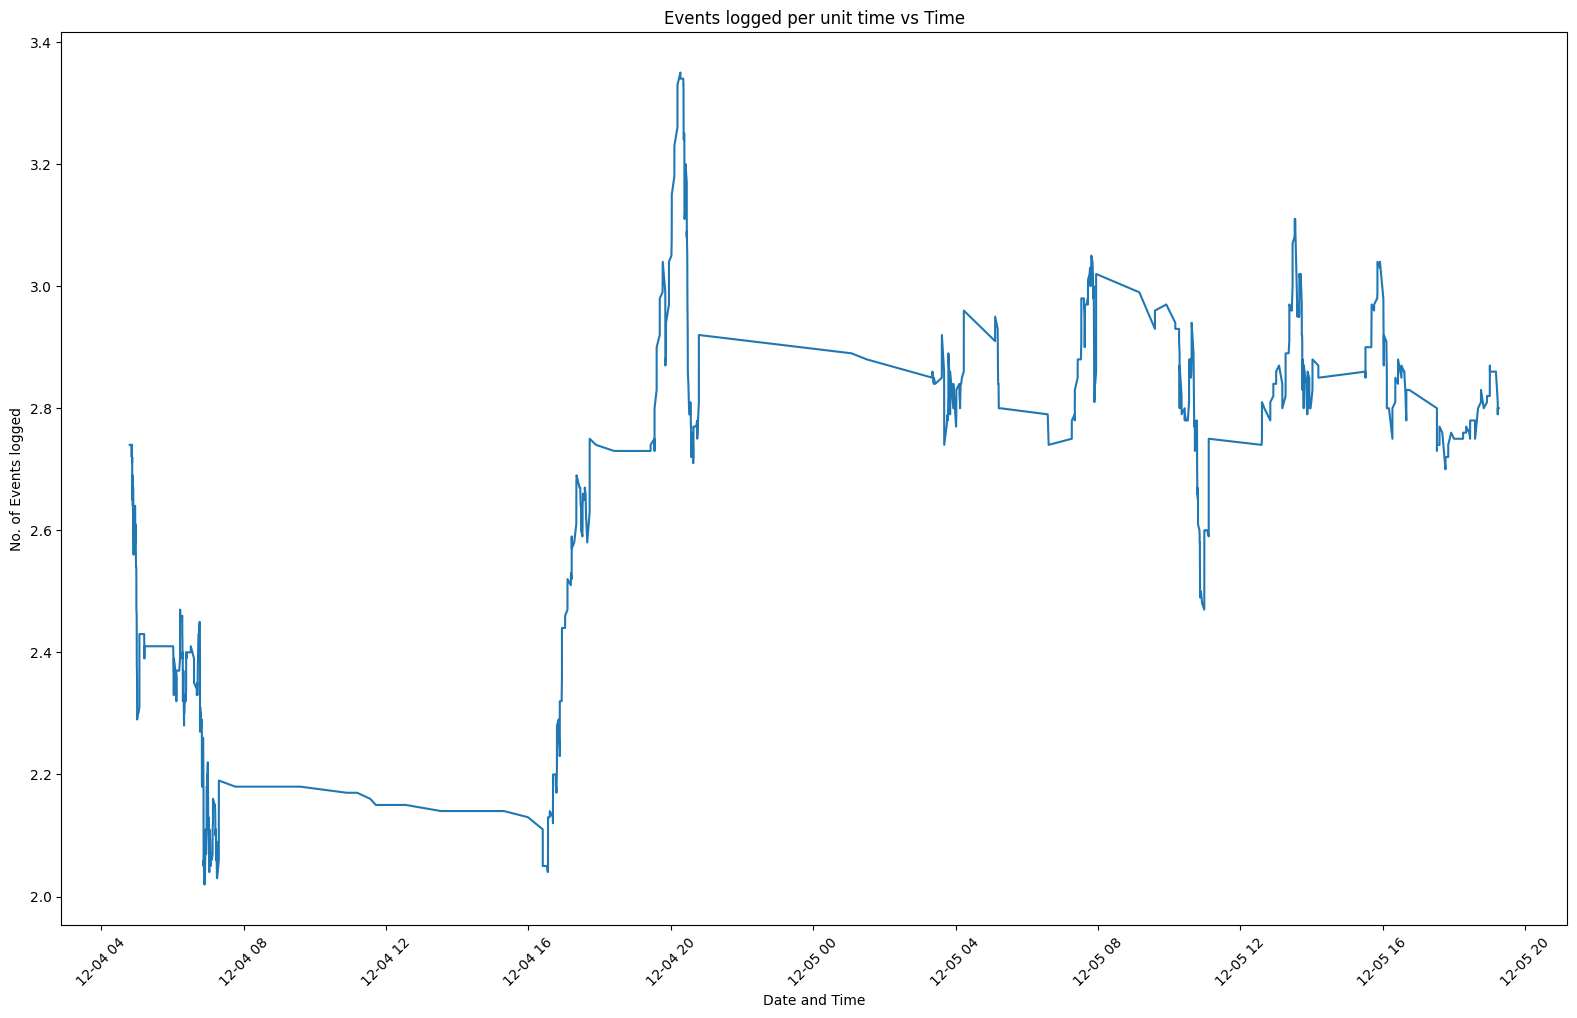

In [15]:
import numpy as np
import matplotlib.pyplot as plt

"""
    EVENTS LOGGED WITH TIME(LINE PLOT).
    What are the possible ways in which I can plot Events logged with time?
    1. Events logged plotted second wise, or hour wise, are too small and too large to make any analysis, respectively.
       I think Events logged per minute would be the best idea.
    
    2. Maybe I can try doing this: Strip the seconds away. From hour and minutes, count the number of instances of each in
       the given csv file, and then try plotting using that.
    
    3. To do this, I'll create dict of datetime objects, with key as the datetime object and value as the number of its
       instances.
    
    4. I need to partition the time to have around 40ish objects, so that I do not end up plotting too many or too few data
       points.
"""

def to_iso(date_str : str):
    day, month, date, time, year = date_str.split(' ')
    month_dict = {
        "Jan": "01", "Feb": "02", "Mar": "03", "Apr": "04",
        "May": "05", "Jun": "06", "Jul": "07", "Aug": "08",
        "Sep": "09", "Oct": "10", "Nov": "11", "Dec": "12"
    }
    return f"{year}-{month_dict[month]}-{date}T{time}"

datetime_dict = {}

with open('./test_logs/Apache_2k.log_structured.csv', 'r') as file:
    for line in file:
        if line.split(',')[0] == 'LineId':
            continue
        full_datetime = line.split(',')[1]
        datetime_iso = np.datetime64(to_iso(full_datetime))
        if datetime_iso in datetime_dict:
            datetime_dict[datetime_iso] += 1
        else:
            datetime_dict[datetime_iso] = 1

#Sorting the dict.
datetime_dict = dict(sorted(datetime_dict.items(), key=lambda x: x[0]))

"""
    Trying the Rolling mean approach:
        Choose a window w(int this case I'll choose a window of maybe size 10), compute the average of w data entries
        occuring before the given data point(and including the given data point), and use that to minimize noise in the
        data set.
"""
window = 100
noise_minimized_datetime = {}
datetime_dict_as_tuples = list(datetime_dict.items())
for i in range(len(datetime_dict)):
    sum = 0
    if i in range(9):
        noise_minimized_datetime[datetime_dict_as_tuples[i][0]] = datetime_dict_as_tuples[i][1]
    for j in range(window):
        sum += datetime_dict_as_tuples[i - j][1]
    sum /= window
    noise_minimized_datetime[datetime_dict_as_tuples[i][0]] = sum

fig, ax = plt.subplots(figsize=(16,10))
ax.set_xlabel('Date and Time')
ax.set_ylabel('No. of Events logged')
ax.set_title('Events logged per unit time vs Time')
x_labels = [date for date in noise_minimized_datetime]
y_labels = [noise_minimized_datetime[date] for date in noise_minimized_datetime]
print(y_labels)
print(x_labels)
plt.xticks(rotation=45)
plt.tight_layout()
ax.plot(x_labels, y_labels)

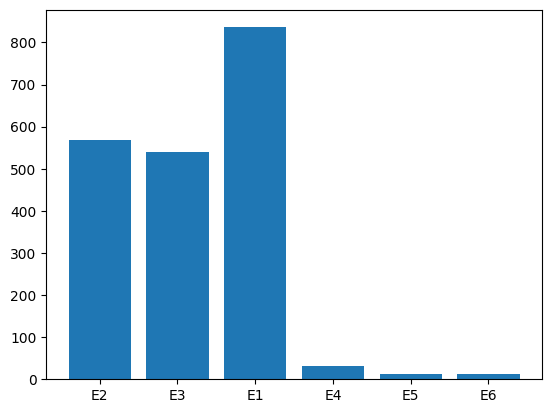

In [13]:
"""
    EVENT CODE DISTRIBUTION(BAR PLOT).
    This one seems pretty straightforward, just count the number of each type of event and put in graph.
"""

event_dict = {}

with open('./test_logs/Apache_2k.log_structured.csv', 'r') as file:
    for line in file:
        if line.split(',')[0] == 'LineId':
            continue
        event_id = line.split(',')[4]
        if event_id in event_dict:
            event_dict[event_id] += 1
        else:
            event_dict[event_id] = 1

x_labels = [key for key in event_dict]
y_labels = [event_dict[key] for key in event_dict]
plt.bar(x_labels,y_labels)
plt.show()

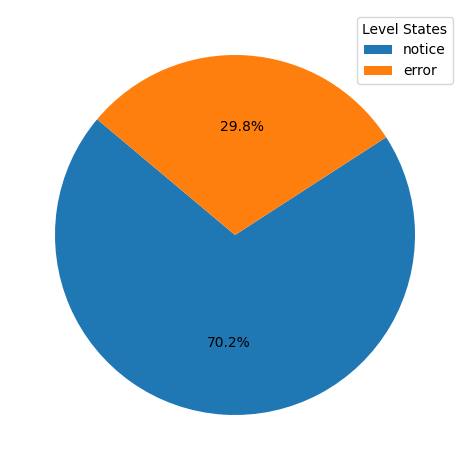

In [41]:
"""
    LEVEL STATE DISTRIBUTION(PIE CHART)
    Have to plot a pie chart between notice and error percentages.
"""

level_dict = {}

with open('output.csv', 'r') as file:
    for line in file:
        if line.split(',')[0] == 'LineId':
            continue
        level = line.split(',')[2]
        if level in level_dict:
            level_dict[level] += 1
        else:
            level_dict[level] = 1
    
    percentages = []
    labels = []
    for key in level_dict:
        labels.append(key)
        percentages.append((level_dict[key] * 100) / (level_dict['notice'] + level_dict['error']))
    wedges, texts, autotexts = plt.pie(percentages, labels=None,labeldistance=0.5, autopct= '%1.1f%%', startangle=140, )
    plt.legend(wedges, labels, title="Level States", loc="upper right")
    plt.tight_layout()
    plt.show()